# 3. Machine Learning
 * <a href="#images">Making Images</a>
 * <a href="#ocr">Optical Character Recognition</a>
 * <a href="#mnist">Train Your Own Neural Network</a>

---
<a id="images"></a>
## Making Images
---

In [1]:
import PIL.Image
import PIL.ImageDraw
import PIL.ImageFont
import PIL.ImageEnhance

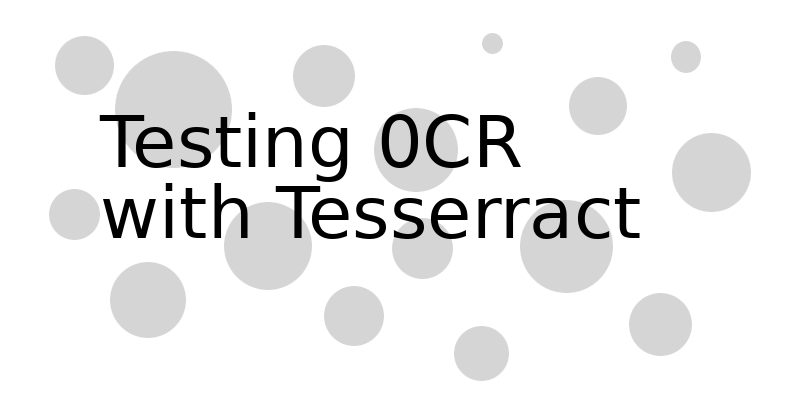

In [3]:
img = PIL.Image.open("dots.png")
canvas = PIL.ImageDraw.Draw(img)
font = PIL.ImageFont.truetype("DejaVuSans.ttf", 72)
#font = PIL.ImageFont.truetype("LiberationSans-Italic.ttf", 72)

txt = "Testing 0CR \nwith Tesserract"
canvas.text((100,100), txt, (0,0,0), font=font)
img

---
<a id="ocr"></a>
## Optical Character Recognition
---

In [4]:
# install tesseract for system and pip install pytesseract
import pytesseract
ocrtext = pytesseract.image_to_string(img)

print(f"expected:\n{txt}")
print(f"\nactual:\n{ocrtext}")

expected:
Testing 0CR 
with Tesserract

actual:
Testing OCR
with Tesserract


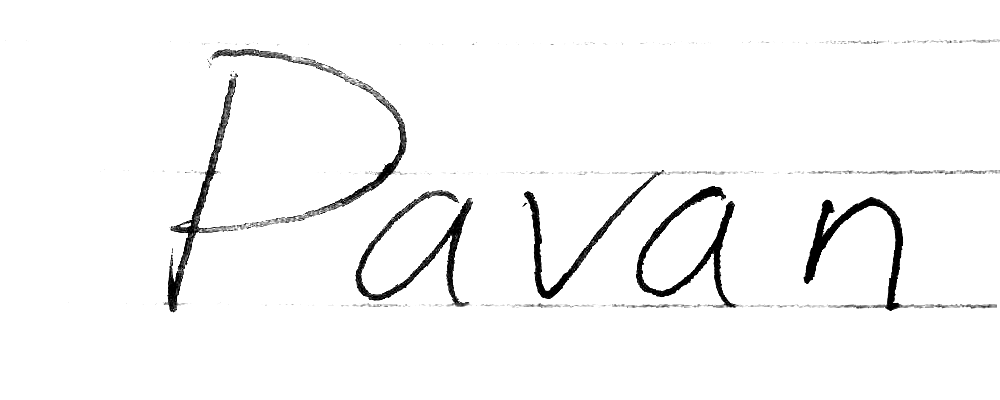

In [5]:
img2 = PIL.Image.open("pavan.jpg").convert("LA")
img2 = img2.crop((0, 0, 1000, 400))
img2 = img2.rotate(-2)
img2 = PIL.ImageEnhance.Brightness(img2).enhance(2.3)
img2 = PIL.ImageEnhance.Contrast(img2).enhance(2.0)
img2

In [6]:
txt = "Pavan"
ocrtext = pytesseract.image_to_string(img2)

print(f"expected:\n{txt}")
print(f"\nactual:\n{ocrtext}")

expected:
Pavan

actual:
Davan |


---
<a id="mnist"></a>
## Train Your Own Neural Network
---

In [7]:
# pip install keras tensorflow

import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils


In [8]:
# load mnist database
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

image 1/60000 digit: 5


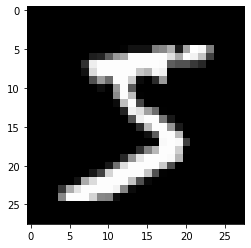

image 2/60000 digit: 0


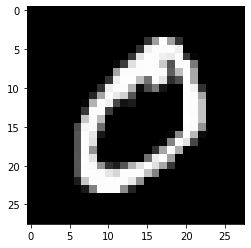

image 3/60000 digit: 4


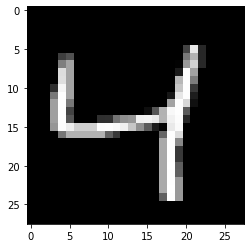

In [9]:
# show first 3 images
for im in range(3):
    print(f"image {im+1}/{Y_train.size} digit: {Y_train[im]}")
    plt.imshow(X_train[im], cmap=plt.get_cmap('gray'))
    plt.show()

In [10]:
# reshape images to 1d arrays and normalize from 0-255 to 0-1
num_of_pixels = X_train.shape[1] * X_train.shape[2]
print(f"num pixels in image = {X_train.shape[1]}x{X_train.shape[2]} = {num_of_pixels}")

# make 1d
X_train = X_train.reshape(X_train.shape[0], num_of_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_of_pixels).astype('float32')

# normalize
X_train = X_train / 255
X_test = X_test / 255

print("[" + (", ").join(["%.1f" % x for x in X_train[0]]) + "]")

num pixels in image = 28x28 = 784
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.5, 0.5, 0.7, 0.1, 0.7, 1.0, 1.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.4, 0.6, 0.7, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 0.7, 1.0, 0.9, 0.8, 0.3, 0.0, 

In [11]:
# create a class for each digit
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
num_classes = Y_test.shape[1]

print("we will try to map from the image to a vector representing a class for each digit")
print("classes:")
print(np.arange(10.0))
print("\nfirst 10 expected outputs:")
for i in range(10):
    print(Y_train[i])
    
print("\nthese can be interpreted as probabilities that the image is that digit")

we will try to map from the image to a vector representing a class for each digit
classes:
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]

first 10 expected outputs:
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]

these can be interpreted as probabilities that the image is that digit


In [13]:
# build the neural network

my_model = Sequential()

print(f"layer from 784 -> 20 = 784x20 + 20 = {784*20+20} params")
my_model.add(Dense(20, input_dim=num_of_pixels, activation="relu"))

print(f"layer from 20 -> 20 = 20x20 + 20 = {20*20+20} params")
my_model.add(Dense(20, activation="relu"))

print(f"layer from 20 -> 10 = 20x10 + 10 = {20*10+10} params")
my_model.add(Dense(num_classes, activation="softmax"))

my_model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
my_model.summary()

layer from 784 -> 20 = 784x20 + 20 = 15700 params
layer from 20 -> 20 = 20x20 + 20 = 420 params
layer from 20 -> 10 = 20x10 + 10 = 210 params
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_5 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


In [15]:
hist = my_model.fit(X_train, Y_train, epochs=10, batch_size=50, verbose=2)


Epoch 1/10
 - 5s - loss: 0.2128 - acc: 0.9393
Epoch 2/10
 - 5s - loss: 0.2051 - acc: 0.9414
Epoch 3/10
 - 5s - loss: 0.1983 - acc: 0.9430
Epoch 4/10
 - 4s - loss: 0.1917 - acc: 0.9455
Epoch 5/10
 - 5s - loss: 0.1856 - acc: 0.9471
Epoch 6/10
 - 5s - loss: 0.1803 - acc: 0.9482
Epoch 7/10
 - 5s - loss: 0.1750 - acc: 0.9500
Epoch 8/10
 - 5s - loss: 0.1702 - acc: 0.9514
Epoch 9/10
 - 5s - loss: 0.1655 - acc: 0.9527
Epoch 10/10
 - 5s - loss: 0.1616 - acc: 0.9532


In [16]:
scores = my_model.evaluate(X_test, Y_test, verbose=0)
print("Error: %.6f%%" % (100-scores[1]*100))

Error: 5.130000%


image 1/10000


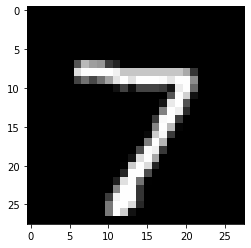

expected: 7
[0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.999,0.000,0.000]
actual: 7


image 2/10000


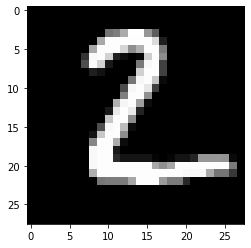

expected: 2
[0.001,0.001,0.957,0.003,0.000,0.037,0.001,0.000,0.000,0.000]
actual: 2


image 3/10000


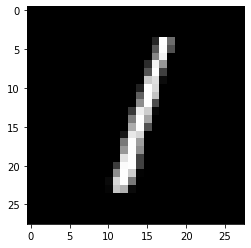

expected: 1
[0.000,0.995,0.002,0.000,0.000,0.001,0.000,0.001,0.001,0.000]
actual: 1


image 4/10000


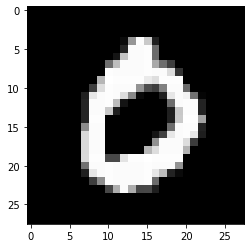

expected: 0
[1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000]
actual: 0


image 5/10000


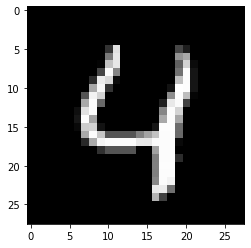

expected: 4
[0.000,0.000,0.001,0.000,0.959,0.001,0.000,0.001,0.000,0.038]
actual: 4




In [17]:
# now i have a model that maps images to a list of digit probabilities

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

for im in range(5):
    # show im
    print(f"image {im+1}/{Y_test.size}")
    plt.imshow(X_test[im], cmap=plt.get_cmap('gray'))
    plt.show()
    
    # show expected
    print(f"expected: {Y_test[im]}")
    
    # predict with image
    flatim = X_test[im].reshape(num_of_pixels).astype("float32") / 255
    pred = my_model.predict(np.array([flatim]), batch_size=1)[0]
    
    # print probabilites and prediction
    print("[" + (",").join(["%.3f" % prob for prob in pred]) + "]")
    print(f"actual: {np.argmax(pred)}\n\n")